In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mall customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.drop('CustomerID', axis=1)

In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df.shape

(200, 4)

In [ ]:
#encode Gender column

In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df = df.rename(columns={'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})

In [8]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


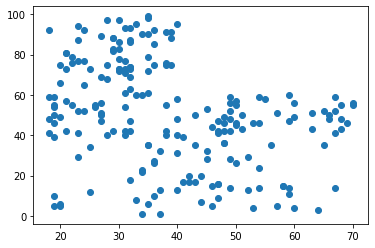

In [9]:
#Vizualization
plt.scatter(df['Age'], df['score'])

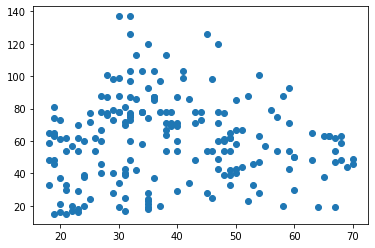

In [10]:
plt.scatter(df['Age'], df['income'])

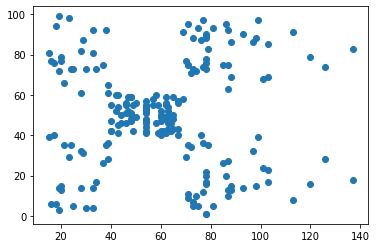

In [11]:
plt.scatter(df['income'], df['score'])

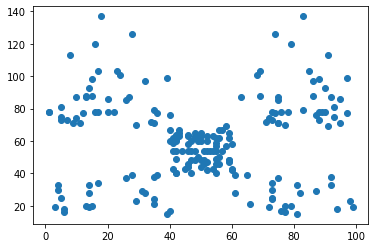

In [12]:
plt.scatter(df['score'],df['income'])

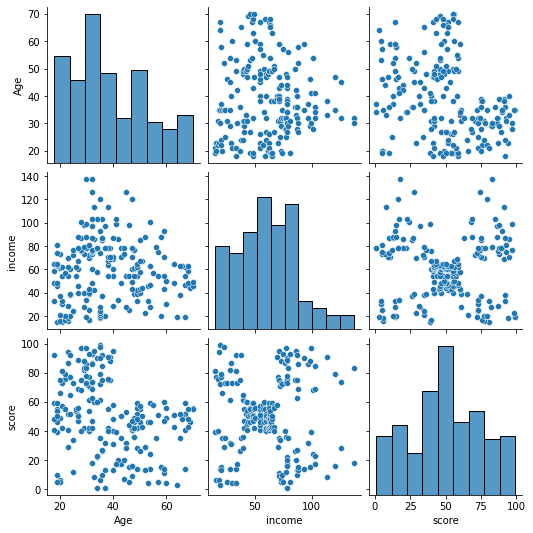

In [13]:
#pairplot
sns.pairplot(df[['Age', 'income', 'score']])

# K Means Cluster

In [14]:
import sklearn.cluster as cluster

In [15]:
kmeans = cluster.KMeans() # default n_clusters=8

In [16]:
predicted = kmeans.fit_predict(df[['income','score']])

In [17]:
predicted

array([5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 0, 7, 0, 0,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0,
       0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 4, 6, 4, 2, 4, 2, 4,
       6, 4, 2, 4, 2, 4, 2, 4, 2, 4, 6, 4, 2, 4, 6, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 6, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [18]:
df['predicted_Cluster'] = predicted

In [19]:
df.head()

,Gender,Age,income,score,predicted_Cluster
0,Male,19,15,39,5
1,Male,21,15,81,7
2,Female,20,16,6,5
3,Female,23,16,77,7
4,Female,31,17,40,5


# Visualization

In [20]:
df1 = df[df.predicted_Cluster == 0]
df2 = df[df.predicted_Cluster == 1]
df3 = df[df.predicted_Cluster == 2]
df4 = df[df.predicted_Cluster == 3]
df5 = df[df.predicted_Cluster == 4]
df6 = df[df.predicted_Cluster == 5]
df7 = df[df.predicted_Cluster == 6]
df8 = df[df.predicted_Cluster == 7]

In [21]:
df1.head()

,Gender,Age,income,score,predicted_Cluster
40,Female,65,38,35,0
42,Male,48,39,36,0
43,Female,31,39,61,0
45,Female,24,39,65,0
46,Female,50,40,55,0


In [22]:
df1.shape

(45, 5)

In [23]:
kmeans.cluster_centers_ # final centroids

array([[ 47.44444444,  51.24444444],
       [109.7       ,  22.        ],
       [ 80.18181818,  12.68181818],
       [108.18181818,  82.72727273],
       [ 78.03571429,  81.89285714],
       [ 25.14285714,  19.52380952],
       [ 63.95238095,  46.21428571],
       [ 25.0952381 ,  80.04761905]])

In [24]:
kmeans.predict([[16,40]])

C:\Users\Study Mart\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([5])

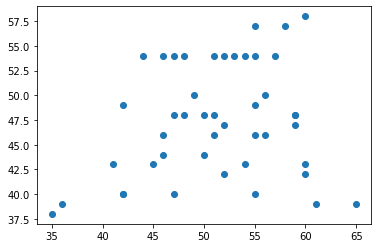

In [25]:
plt.scatter(df1['score'], df1['income'])

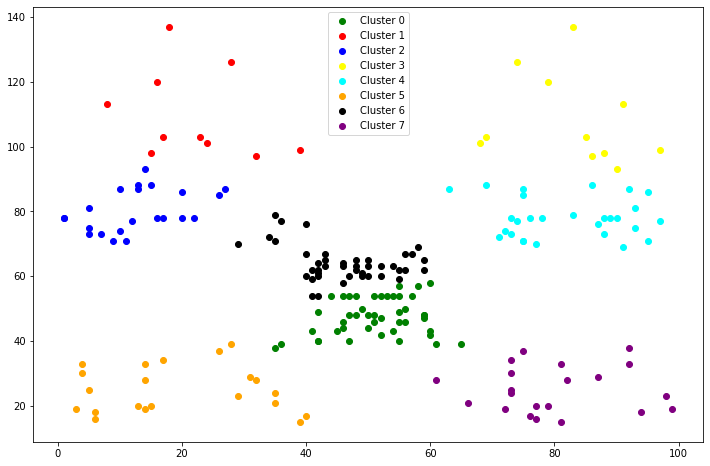

In [26]:

plt.figure(figsize=(12,8))

plt.scatter(df1['score'], df1['income'], color='green', label='Cluster 0')
plt.scatter(df2['score'], df2['income'], color='red', label='Cluster 1')
plt.scatter(df3['score'], df3['income'], color='blue', label='Cluster 2')
plt.scatter(df4['score'], df4['income'], color='yellow', label='Cluster 3')
plt.scatter(df5['score'], df5['income'], color='cyan', label='Cluster 4')
plt.scatter(df6['score'], df6['income'], color='orange', label='Cluster 5')
plt.scatter(df7['score'], df7['income'], color='black', label='Cluster 6')
plt.scatter(df8['score'], df8['income'], color='purple', label='Cluster 7')

plt.legend()

# Tuning / Optimization Cluster

In [27]:
from sklearn.cluster import KMeans

wcss = []

clusters = range(1,15)

for k in range(1,15):
    kmeans2 = KMeans(n_clusters=k)
    kmeans2.fit(df[['score','income']])
    wcss.append(kmeans2.inertia_)  # inertia_ = Sum of the squared error , SSE

C:\Users\Study Mart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 30259.65720728547,
 25030.38309852033,
 21916.794789843727,
 19664.685196005543,
 17918.270582950077,
 16084.487959426195,
 14300.044641632878,
 13007.080325814537]

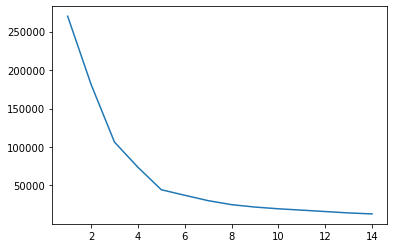

In [29]:
plt.plot(clusters , wcss) # elbow method

# After Tuning K=5

In [30]:
kmeans = cluster.KMeans(n_clusters=5)

In [31]:
new_predicted = kmeans.fit_predict(df[['income','score']])

In [33]:
df['new_clusters'] = new_predicted

In [34]:
df.head()

,Gender,Age,income,score,predicted_Cluster,new_clusters
0,Male,19,15,39,5,0
1,Male,21,15,81,7,2
2,Female,20,16,6,5,0
3,Female,23,16,77,7,2
4,Female,31,17,40,5,0


In [35]:
df=df.drop('predicted_Cluster', axis=1)

In [36]:
df.head() #  k=5

,Gender,Age,income,score,new_clusters
0,Male,19,15,39,0
1,Male,21,15,81,2
2,Female,20,16,6,0
3,Female,23,16,77,2
4,Female,31,17,40,0


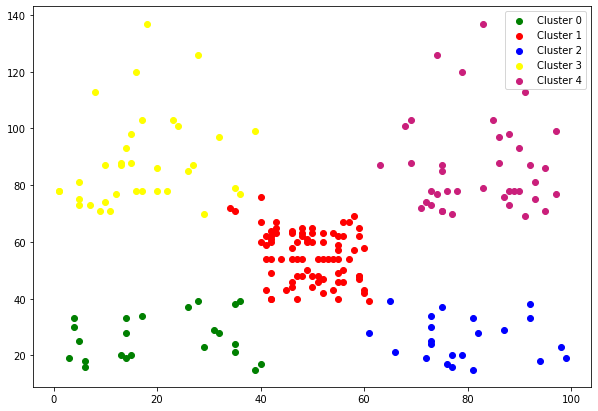

In [37]:
df1 = df[df.new_clusters == 0]
df2 = df[df.new_clusters == 1]
df3 = df[df.new_clusters == 2]
df4 = df[df.new_clusters == 3]
df5 = df[df.new_clusters == 4]

plt.figure(figsize=(10,7))

plt.scatter(df1['score'], df1['income'], color='green', label='Cluster 0')
plt.scatter(df2['score'], df2['income'], color='red', label='Cluster 1')
plt.scatter(df3['score'], df3['income'], color='blue', label='Cluster 2')
plt.scatter(df4['score'], df4['income'], color='yellow', label='Cluster 3')
plt.scatter(df5['score'], df5['income'], color='#CA1F7B', label='Cluster 4')

plt.legend()

In [38]:
center=kmeans.cluster_centers_
center

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513]])

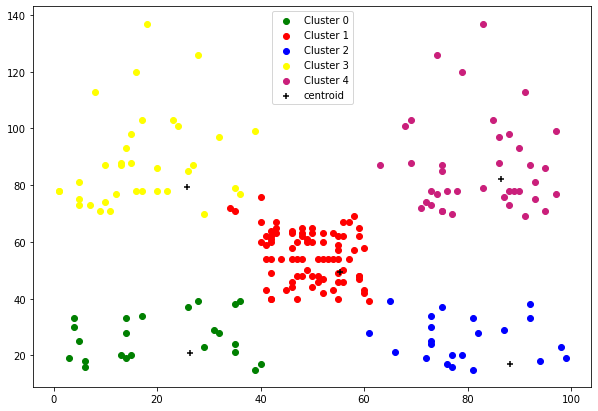

In [40]:
# WITH Centroid
df1 = df[df.new_clusters == 0]
df2 = df[df.new_clusters == 1]
df3 = df[df.new_clusters == 2]
df4 = df[df.new_clusters == 3]
df5 = df[df.new_clusters == 4]

plt.figure(figsize=(10,7))

plt.scatter(df1['score'], df1['income'], color='green', label='Cluster 0')
plt.scatter(df2['score'], df2['income'], color='red', label='Cluster 1')
plt.scatter(df3['score'], df3['income'], color='blue', label='Cluster 2')
plt.scatter(df4['score'], df4['income'], color='yellow', label='Cluster 3')
plt.scatter(df5['score'], df5['income'], color='#CA1F7B', label='Cluster 4')

plt.scatter(center[:,0], center[:,1], color='black', marker='+', label='centroid') # all centers

plt.legend()

# Kneed

!pip install kneed

In [41]:
from kneed import KneeLocator
kn = KneeLocator(clusters , wcss, curve='convex', direction = 'decreasing' )

In [42]:
kn

In [43]:
optimal_num_cluster = kn.knee
print('optimal_num_cluster = ', optimal_num_cluster)

optimal_num_cluster =  5


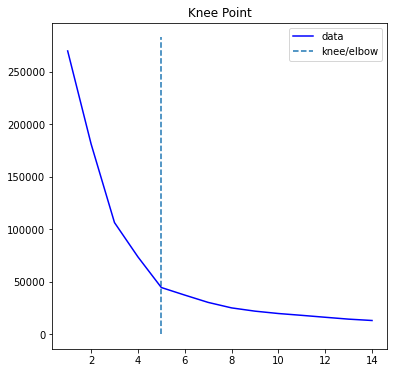

In [44]:
kn.plot_knee()